In [9]:
!pip install tiktoken

In [10]:
from importlib.metadata import version

pkgs = ["matplotlib",
        "numpy",
        "tiktoken",
        "torch",
        "tensorflow", # For OpenAI's pretrained weights
        "pandas"      # Dataset loading
       ]
for p in pkgs:
    print(f"{p} version: {version(p)}")

matplotlib version: 3.7.1
numpy version: 1.25.2
tiktoken version: 0.7.0
torch version: 2.3.0+cu121
tensorflow version: 2.15.0
pandas version: 2.0.3


In [11]:
import urllib.request
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return

    # Downloading the file
    with urllib.request.urlopen(url) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    # Unzipping the file
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    # Add .tsv file extension
    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip(url, zip_path, extracted_path, data_file_path)

sms_spam_collection/SMSSpamCollection.tsv already exists. Skipping download and extraction.


In [12]:
import pandas as pd

df = pd.read_csv(data_file_path, sep="\t", header=None, names=["Label", "Text"])
df["Label"] = df["Label"].map({"ham": 0, "spam": 1})
df

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
print(df["Label"].value_counts())

Label
0    4825
1     747
Name: count, dtype: int64


In [14]:
def create_balanced_dataset(df):

    # Count the instances of "spam"
    num_spam = df[df["Label"] == "spam"].shape[0]

    # Randomly sample "ham' instances to match the number of 'spam' instances
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)

    # Combine ham "subset" with "spam"
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])

    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

Series([], Name: count, dtype: int64)


In [15]:
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})

In [16]:
data = pd.read_csv('/content/ScamDataNew.csv')
testData=pd.read_excel("/content/scams13.xlsx")
df.rename(columns={'Text':'Scammer'},inplace=True)
testData.rename(columns={'content': 'Scammer'}, inplace=True)
testData.rename(columns={'is scam': 'Label'}, inplace=True)
balanced_df= pd.concat([balanced_df, data], ignore_index=True)
balanced_df= pd.concat([balanced_df, testData], ignore_index=True)

In [17]:
print(balanced_df)

      Label Text                                            Scammer scam type  \
0         1  NaN  Hello this is HUGIE Finance calling.  We're cu...       NaN   
1         0  NaN  Pepperfry item (Yukashi 3 Door Wardro...) deli...       NaN   
2         1  NaN  Act now to benefit from our unique offer. Tran...       NaN   
3         0  NaN  It's Shoppers Stop BirthYAY & we loved every m...       NaN   
4         1  NaN  Hello I'm calling from MUTHOOT Finance.  We're...       NaN   
...     ...  ...                                                ...       ...   
1842      0  NaN  EXCITING NEWS! Dwayne 'The Rock' Johnson here!...  Phishing   
1843      1  NaN  URGENT! Dwayne 'The Rock' Johnson here! I'm gi...  Phishing   
1844      0  NaN  Hey! Dwayne 'The Rock' Johnson here! To celebr...  Phishing   
1845      1  NaN  URGENT! Dwayne 'The Rock' Johnson here! I've p...  Phishing   
1846      0  NaN  EXCITING NEWS! Dwayne 'The Rock' Johnson here!...  Phishing   

                           

In [18]:
def random_split(df, train_frac, validation_frac):
    # Shuffle the entire DataFrame
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # Calculate split indices
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)

    # Split the DataFrame
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)
# Test size is implied to be 0.2 as the remainder

train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)

In [19]:
# train_df.rename(columns={'Text': 'Scammer'}, inplace=True)
# validation_df.rename(columns={'Text': 'Scammer'}, inplace=True)
# test_df.rename(columns={'Text': 'Scammer'}, inplace=True)

In [20]:
train_df

,Label,Text,Scammer,scam type,trick type,attack type,reason
0,0,NaN,Automatic payment of Rs.3000 will be deducted ...,NaN,NaN,NaN,NaN
1,1,NaN,"Hi there, I'm reaching out from HDFC's custome...",NaN,NaN,NaN,NaN
2,1,NaN,Urgent! Your PayPa1 account has been temporarl...,Phishing,"Scarcity, Using Manipulative Language","Intentional spelling mistakes, Homograph Attack","[""Creates a sense of urgency with 'Urgent!' to..."
3,0,NaN,"Nitesh, 3 days for our Merry Xmas Party with P...",NaN,NaN,NaN,NaN
4,1,NaN,"Hello, I've been trying to send the amount for...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1287,0,NaN,Alert: We've detected unusual activity on your...,Phishing,"Authority, Making False Threats","Intentional spelling mistakes, Homograph Attack","[""It's from a trusted source (the account prov..."
1288,1,NaN,"Dear Valued Customer, This is Officier John fr...",Phishing,"Scarcity, Using Fake Accents or Identities","Intentional spelling mistakes, Homograph Attack",['Uses scarcity tactic to create a sense of ur...
1289,0,NaN,FLAT 50% OFF on purchase of 25K at the Benetto...,NaN,NaN,NaN,NaN
1290,1,NaN,Good day Sir. With our FAMILYSAFE plan your fa...,NaN,NaN,NaN,NaN


In [21]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))

[50256]


In [22]:
tokenizer.encode("K. I will sent it again")

[42, 13, 314, 481, 1908, 340, 757]

In [23]:
import torch
from torch.utils.data import Dataset


class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        self.data = pd.read_csv(csv_file)

        # Pre-tokenize texts
        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["Scammer"]
        ]

        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length
            # Truncate sequences if they are longer than max_length
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]

        # Pad sequences to the longest sequence
        self.encoded_texts = [
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        # Assuming label is a string, convert it to an integer before creating the tensor
        label = int(self.data.iloc[index]["Label"])
        return torch.tensor(encoded, dtype=torch.long), torch.tensor(label, dtype=torch.long)


    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

In [24]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load the ScamData.csv file


# # Split the data into train and test sets (80% train, 20% test)
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# # Further split the train data into train and validation sets (80% train, 20% validation)
# train_data, validation_data = train_test_split(train_data, test_size=0.2, random_state=42)

# # Save the split data into separate CSV files
# train_data.to_csv('train1.csv', index=False)
# test_data.to_csv('test1.csv', index=False)
# validation_data.to_csv('validation1.csv', index=False)

In [25]:
# merged_df = pd.concat([train_data, train_df], ignore_index=True)
# merged_df=pd.concat([merged_df,test])
# merged_df.to_csv('train2.csv',index=False)
# merged_df1 = pd.concat([test_data, test_df], ignore_index=True)
# merged_df1.to_csv('test2.csv',index=False)
# merged_df2 = pd.concat([validation_data, validation_df], ignore_index=True)
# merged_df2.to_csv('validation2.csv',index=False)

In [26]:
train_dataset = SpamDataset("train.csv", max_length=None, tokenizer=tokenizer)
print(train_dataset)

In [27]:
val_dataset = SpamDataset("validation.csv", max_length=train_dataset.max_length, tokenizer=tokenizer)
test_dataset = SpamDataset("test.csv", max_length=train_dataset.max_length, tokenizer=tokenizer)

In [28]:
from torch.utils.data import DataLoader

num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

In [29]:
print(train_loader)
for input_batch, target_batch in train_loader:
    pass
    print("Input batch dimensions:", input_batch.shape)
    print("Label batch dimensions", target_batch.shape)

Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Size([8])
Input batch dimensions: torch.Size([8, 155])
Label batch dimensions torch.Si

In [30]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

161 training batches
23 validation batches
47 test batches


In [31]:
CHOOSE_MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

In [32]:
from gpt_download import download_and_load_gpt2
from utils import GPTModel, load_weights_into_gpt

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval();

checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 82.4kiB/s]
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.41MiB/s]
hparams.json: 100%|██████████| 90.0/90.0 [00:00<00:00, 23.3kiB/s]
model.ckpt.data-00000-of-00001: 100%|██████████| 498M/498M [00:16<00:00, 30.7MiB/s]
model.ckpt.index: 100%|██████████| 5.21k/5.21k [00:00<00:00, 10.6MiB/s]
model.ckpt.meta: 100%|██████████| 471k/471k [00:00<00:00, 1.76MiB/s]
vocab.bpe: 100%|██████████| 456k/456k [00:00<00:00, 1.78MiB/s]


In [33]:
from utils import (
    generate_text_simple,
    text_to_token_ids,
    token_ids_to_text
)


text_1 = "Every effort moves you"

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_1, tokenizer),
    max_new_tokens=15,
    context_size=BASE_CONFIG["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))

Every effort moves you forward.

The first step is to understand the importance of your work


In [34]:
text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    " 'You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award.'"
    " Answer with 'yes' or 'no'."
)

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_2, tokenizer),
    max_new_tokens=23,
    context_size=BASE_CONFIG["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive $1000 cash or a $2000 award.' Answer with 'yes' or 'no'. Answer with 'yes' or 'no'. Answer with 'yes' or 'no'. Answer with 'yes'


In [35]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768,

In [36]:
for param in model.parameters():
    param.requires_grad = False

In [37]:
torch.manual_seed(123)

num_classes = 2
model.out_head = torch.nn.Linear(in_features=BASE_CONFIG["emb_dim"], out_features=num_classes)

In [38]:
for param in model.trf_blocks[-1].parameters():
    param.requires_grad = True

for param in model.final_norm.parameters():
    param.requires_grad = True

In [39]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape) # shape: (batch_size, num_tokens)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [40]:
with torch.no_grad():
    outputs = model(inputs)

print("Outputs:\n", outputs)
print("Outputs dimensions:", outputs.shape) # shape: (batch_size, num_tokens, num_classes)

Outputs:
 tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]])
Outputs dimensions: torch.Size([1, 4, 2])


In [41]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]])


In [42]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[:, -1, :]  # Logits of last output token
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

In [43]:
# Same as in chapter 5
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes

torch.manual_seed(123) # For reproducibility due to the shuffling in the training data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)

print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")

Training loss: 3.073
Validation loss: 3.081
Test loss: 2.835


In [45]:
@torch.no_grad() # Disable gradient tracking for efficiency
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions, num_examples = 0, 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)
            logits = model(input_batch)[:, -1, :]  # Logits of last output token
            predicted_labels = torch.argmax(logits, dim=-1)

            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break
    return correct_predictions / num_examples

In [46]:
torch.manual_seed(123)
train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 40.00%
Validation accuracy: 41.25%
Test accuracy: 38.75%


In [47]:
# Overall the same as `train_model_simple` in chapter 5
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous epoch
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            examples_seen += input_batch.shape[0] # New: track examples instead of tokens
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [48]:
# Same as chapter 5
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [49]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

num_epochs = 5
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
    tokenizer=tokenizer
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 3.081, Val loss 2.850
Ep 1 (Step 000050): Train loss 0.691, Val loss 0.701
Ep 1 (Step 000100): Train loss 0.667, Val loss 0.698
Ep 1 (Step 000150): Train loss 0.627, Val loss 0.697
Training accuracy: 52.50% | Validation accuracy: 52.50%
Ep 2 (Step 000200): Train loss 0.674, Val loss 0.704
Ep 2 (Step 000250): Train loss 0.602, Val loss 0.613
Ep 2 (Step 000300): Train loss 0.399, Val loss 0.444
Training accuracy: 80.00% | Validation accuracy: 95.00%
Ep 3 (Step 000350): Train loss 0.411, Val loss 0.377
Ep 3 (Step 000400): Train loss 0.323, Val loss 0.345
Ep 3 (Step 000450): Train loss 0.341, Val loss 0.283
Training accuracy: 80.00% | Validation accuracy: 80.00%
Ep 4 (Step 000500): Train loss 0.304, Val loss 0.244
Ep 4 (Step 000550): Train loss 0.131, Val loss 0.238
Ep 4 (Step 000600): Train loss 0.201, Val loss 0.215
Training accuracy: 90.00% | Validation accuracy: 97.50%
Ep 5 (Step 000650): Train loss 0.208, Val loss 0.243
Ep 5 (Step 000700): Train loss 0.1

In [50]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig(f"{label}-plot.pdf")
    plt.show()

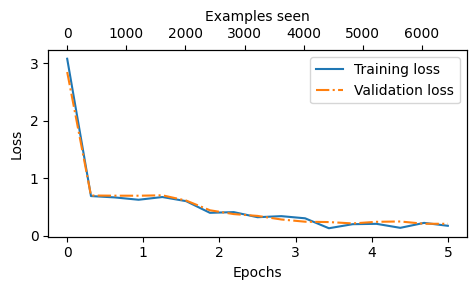

In [51]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

In [52]:
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 94.64%
Validation accuracy: 95.11%
Test accuracy: 92.99%


In [53]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()

    # Prepare inputs to the model
    input_ids = tokenizer.encode(text)
    supported_context_length = model.pos_emb.weight.shape[1]

    # Truncate sequences if they too long
    input_ids = input_ids[:min(max_length, supported_context_length)]

    # Pad sequences to the longest sequence
    input_ids += [pad_token_id] * (max_length - len(input_ids))
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0) # add batch dimension

    # Model inference
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]  # Logits of the last output token
    predicted_label = torch.argmax(logits, dim=-1).item()

    # Return the classified result
    return "Positive" if predicted_label == 1 else "Negative"

In [54]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print(classify_review(text_1, model, tokenizer, device, max_length=train_dataset.max_length))

Negative


In [55]:
text_2 = (
    "Click this link to enter your account details to claim the lottery www.google.com"
)

print(classify_review(text_2, model, tokenizer, device, max_length=train_dataset.max_length))

Negative


In [56]:
torch.save(model.state_dict(), "spam_classifier.pth")

In [57]:
model_state_dict = torch.load("spam_classifier.pth")
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [58]:
t1=pd.read_excel('/content/scams12.xlsx')

In [59]:
text=t1['content']
label=t1['is scam']

In [60]:
c=0
c1=0
for i in range(len(t1)):
  st=classify_review(text[i], model, tokenizer, device, max_length=train_dataset.max_length)
  pr='Negative' if label[i]==0 else'Positive'
  print(st,pr)
  if st=='Negative':
    c1=c1+1
  if st==pr:
    c=c+1
print(c/len(t1))

Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative N

In [61]:
print(c1)

306


In [62]:
# from google.colab import drive
# drive.mount('/content/drive')

In [63]:
pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 47.8 MB/s eta 0:00:00


In [64]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from tokenizers import Encoding

# Load fine-tuned GPT-2 model
model_path = "/content/spam_classifier.pth"
model.load_state_dict(torch.load(model_path))
model = model.to(device)


# Prepare sample input
dummy_input = torch.randint(0, 50257, (1, BASE_CONFIG["context_length"]), dtype=torch.int64).to(device)
torch.onnx.export(model, dummy_input, "quantized_modelgpt.onnx", opset_version=12, verbose=True)

/content/utils.py:119: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  torch.sqrt(torch.tensor(2.0 / torch.pi)) *


In [65]:
import os

# Path to your ONNX file
onnx_file_path = "quantized_modelgpt.onnx"  # Replace with the path to your ONNX file

# Get the size of the ONNX file
onnx_file_size = os.path.getsize(onnx_file_path)

print("Size of the ONNX file:", onnx_file_size, "bytes")

Size of the ONNX file: 503057794 bytes


In [66]:
!pip install onnx-tf
import onnx_tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [69]:
import onnx
# onnx_model_path= onnx.load("quantized_modelgpt.onnx")
onnx_model = onnx.load('/content/quantized_modelgpt.onnx')
# Define a mapping from old names to new names
name_map = {"input.1": "input_1"}

# Initialize a list to hold the new inputs
new_inputs = []

# Iterate over the inputs and change their names if needed
for inp in onnx_model.graph.input:
    if inp.name in name_map:
        # Create a new ValueInfoProto with the new name
        new_inp = onnx.helper.make_tensor_value_info(name_map[inp.name],
                                                inp.type.tensor_type.elem_type,
                                                [dim.dim_value for dim in inp.type.tensor_type.shape.dim])
        new_inputs.append(new_inp)
    else:
        new_inputs.append(inp)

# Clear the old inputs and add the new ones
onnx_model.graph.ClearField("input")
onnx_model.graph.input.extend(new_inputs)

# Go through all nodes in the model and replace the old input name with the new one
for node in onnx_model.graph.node:
    for i, input_name in enumerate(node.input):
        if input_name in name_map:
            node.input[i] = name_map[input_name]

# Save the renamed ONNX model
onnx.save(onnx_model, 'modelgpt2.onnx')

In [70]:
onnx_model = onnx.load("modelgpt2.onnx")
# Convert ONNX model to TensorFlow format
tf_model = onnx_tf.backend.prepare(onnx_model)

In [71]:
tf_model.export_graph("modelgpt.tf")

In [72]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("modelgpt.tf")
tflite_model = converter.convert()
open('modelgpt.tflite', 'wb').write(tflite_model)

612195428

In [73]:
os.path.getsize('/content/modelgpt.tflite')

612195428

In [74]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="modelgpt.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def classify_text2(text, tokenizer, max_length, pad_token_id=50256):
    # Prepare inputs to the model
    input_ids = tokenizer.encode(text)
    supported_context_length = input_details[0]['shape'][1]

    # Truncate sequences if they're too long
    input_ids = input_ids[:min(max_length, supported_context_length)]

    # Pad sequences to the longest sequence
    input_ids += [pad_token_id] * (max_length - len(input_ids))
    input_tensor = np.array(input_ids, dtype=np.int64).reshape((1, max_length))  # add batch dimension

    # Set input tensor to the model
    interpreter.set_tensor(input_details[0]['index'], input_tensor)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_tensor = interpreter.get_tensor(output_details[0]['index'])[:,-1,:]
    print(output_tensor)
    # Interpret the output
    predicted_label = np.argmax(output_tensor, axis=-1).item()

    # # Return the classified result
    return "Positive" if predicted_label == 1 else "Negative"


In [75]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print(classify_text2(text_1, tokenizer, max_length=1024))

[[-3.206485   3.0669894]]
Positive


In [76]:
c=0
c1=0
for i in range(len(t1)):
  st=classify_review(text[i], model, tokenizer, device, max_length=train_dataset.max_length)
  pr='Negative' if label[i]==0 else'Positive'
  print(st,pr)
  if st=='Negative':
    c1=c1+1
  if st==pr:
    c=c+1
print(c/len(t1))

Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Positive Positive
Negative Negative
Negative Positive
Negative Negative
Negative Positive
Negative N